# **Introduction to Deep Model Interpretability**

Tutorial for 2019 Data Science Conference in Belgrade.

By Miloš Stojanović

# Imports

We could also do tensorflow 2.x but it was not supported at the time.


In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import urllib
import scipy
import cv2

# Part 1: Visualize and understand low level filters

## Load the pretrained model to be analyzed

Here, Keras will automatically download the pretrained weights and load the model.

In [606]:
MODEL_NAME = 'VGG'

assert MODEL_NAME in {'VGG', 'ResNet'}

if MODEL_NAME == 'VGG':
  model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False)
  print('Model loaded.')
elif MODEL_NAME == 'ResNet':
  model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False)
  print('Model loaded.')

model.summary()

Model loaded.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None,

## Analyze and visualzie the weights

In [196]:
model.weights

[<tf.Variable 'conv1_conv_4/kernel:0' shape=(7, 7, 3, 64) dtype=float32>,
 <tf.Variable 'conv1_conv_4/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1_bn_4/gamma:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1_bn_4/beta:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1_bn_4/moving_mean:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1_bn_4/moving_variance:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_conv_4/kernel:0' shape=(1, 1, 64, 64) dtype=float32>,
 <tf.Variable 'conv2_block1_1_conv_4/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_bn_4/gamma:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_bn_4/beta:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_bn_4/moving_mean:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_bn_4/moving_variance:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_2_conv_4/kernel:0' shape=(3, 3, 64, 64) dtype=float32>,
 <tf.Variable 'conv2_block1_2_conv_4/bias:0' shape=

In [197]:
model.layers

In [0]:
if MODEL_NAME == 'VGG':
  weights = model.layers[1].get_weights()
elif MODEL_NAME == 'ResNet':
  weights = model.layers[2].get_weights()

In [202]:
len(weights)

2

In [0]:
kernels = weights[0]

In [204]:
kernels

array([[[[ 2.82526277e-02, -1.18737184e-02,  1.51488732e-03, ...,
          -1.07003953e-02, -5.27982824e-02, -1.36667420e-03],
         [ 5.86827798e-03,  5.04415408e-02,  3.46324709e-03, ...,
           1.01423981e-02,  1.39493728e-02,  1.67549420e-02],
         [-2.44090753e-03, -4.86173332e-02,  2.69966386e-03, ...,
          -3.44439060e-04,  3.48098315e-02,  6.28910400e-03]],

        [[ 1.81872323e-02, -7.20698107e-03,  4.80302610e-03, ...,
          -7.43396254e-03, -8.56800564e-03,  1.16849300e-02],
         [ 1.87554304e-02,  5.12730293e-02,  4.50406177e-03, ...,
           1.39413681e-02,  1.26296384e-02, -1.73004344e-02],
         [ 1.90453827e-02, -3.87909152e-02,  4.25842637e-03, ...,
           2.75742816e-04, -1.27962548e-02, -8.35626759e-03]],

        [[ 1.58849321e-02, -1.06073255e-02,  1.30999666e-02, ...,
          -2.26797583e-03, -3.98984266e-04,  3.39989027e-04],
         [ 3.61421369e-02,  5.02430499e-02,  1.22699486e-02, ...,
           1.19910473e-02,  2.0283

In [205]:
kernels.shape

(7, 7, 3, 64)

**Visualize the kernel matrix**

In [206]:
K.image_data_format()

'channels_last'

<Figure size 432x288 with 0 Axes>

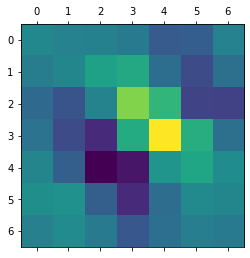

In [207]:
plt.figure()
plt.matshow(kernels[:, :, 0, 0])

<Figure size 432x288 with 0 Axes>

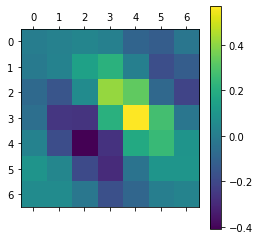

In [208]:
plt.figure()
plt.matshow(kernels[:, :, 1, 0])
plt.colorbar()

<Figure size 432x288 with 0 Axes>

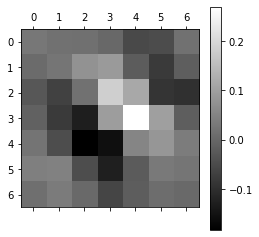

0


<Figure size 432x288 with 0 Axes>

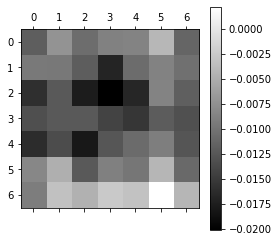

1


<Figure size 432x288 with 0 Axes>

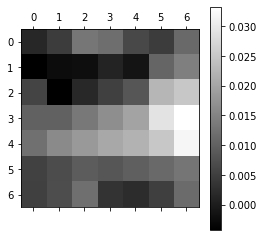

2


<Figure size 432x288 with 0 Axes>

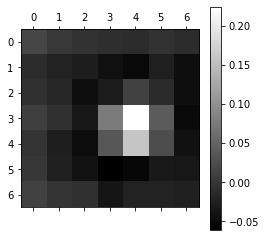

3


<Figure size 432x288 with 0 Axes>

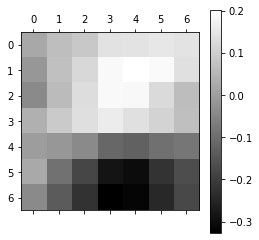

4


<Figure size 432x288 with 0 Axes>

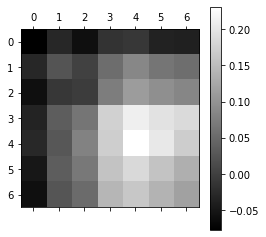

5


<Figure size 432x288 with 0 Axes>

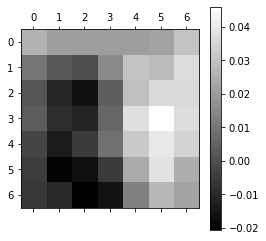

6


<Figure size 432x288 with 0 Axes>

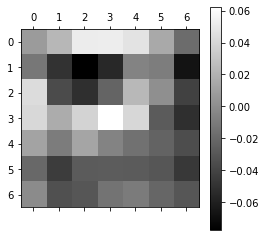

7


<Figure size 432x288 with 0 Axes>

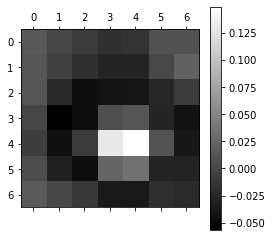

8


<Figure size 432x288 with 0 Axes>

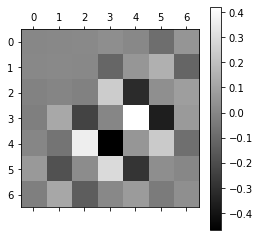

9


In [214]:
for i in range(0, 10):
  plt.figure()
  plt.matshow(kernels[:, :, 0, i], cmap='gray')  
  plt.colorbar()
  plt.show()
  print(i)

Show all 3 channels in parallel

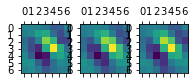

0


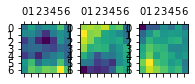

1


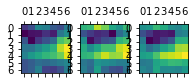

2


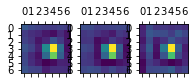

3


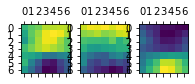

4


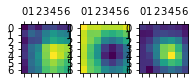

5


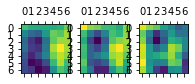

6


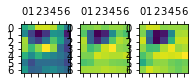

7


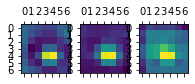

8


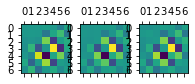

9


In [226]:
for i in range(0, 10):
  plt.figure(figsize=(3, 1))
  for j in range(0, 3):
    #plt.matshow(kernels[:, :, 0, i])
    plt.subplot(1, 3, j + 1)
    plt.matshow(kernels[:, :, j, i], fignum=False)
  #plt.colorbar()
  plt.show()
  print(i)

**Show kernels as RGB Image**

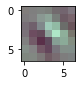

0


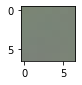

1


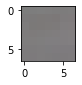

2


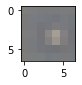

3


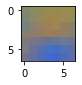

4


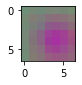

5


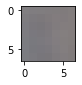

6


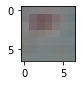

7


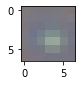

8


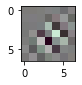

9


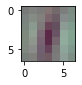

10


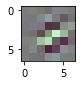

11


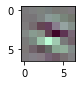

12


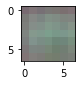

13


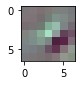

14


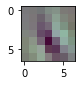

15


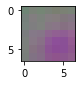

16


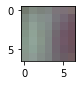

17


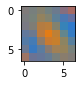

18


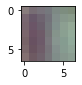

19


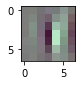

20


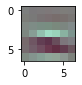

21


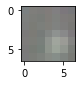

22


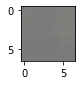

23


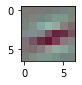

24


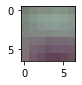

25


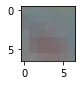

26


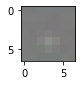

27


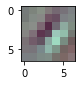

28


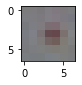

29


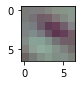

30


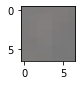

31


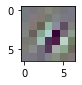

32


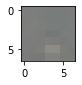

33


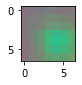

34


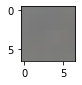

35


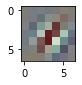

36


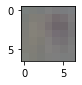

37


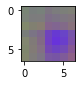

38


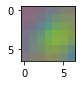

39


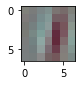

40


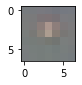

41


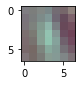

42


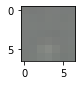

43


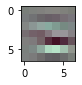

44


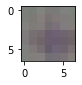

45


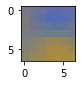

46


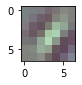

47


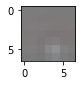

48


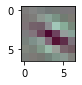

49


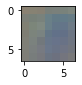

50


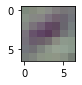

51


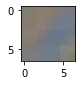

52


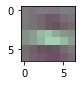

53


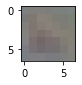

54


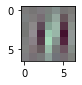

55


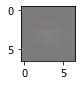

56


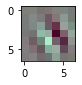

57


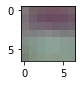

58


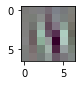

59


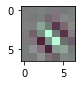

60


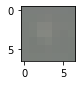

61


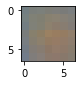

62


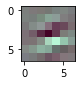

63


In [218]:
kernels_norm = (kernels - kernels.min()) / (kernels.max() - kernels.min())

for i in range(0, 64):
  plt.figure(figsize=(3, 1))
  plt.imshow((kernels_norm[:, :, :, i] * 255.0).astype(np.uint8))
  plt.show()
  print(i)

## Apply the kernel to an input image

In [0]:
url_img = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/4/41/KnezMihailova_ped.jpg')

In [0]:
img = plt.imread(url_img, format='jpg')

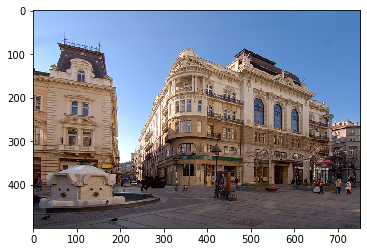

In [167]:
plt.imshow(img)

In [168]:
img.shape

(500, 752, 3)

In [0]:
img = np.expand_dims(img, axis=0)

In [171]:
img.shape

(1, 500, 752, 3)

In [0]:
#img = tf.keras.applications.vgg16.preprocess_input(img)
img = tf.keras.applications.resnet50.preprocess_input(img)

Here we use K.function to seamlessly process the data without boilerplate code.

In [0]:
#get_activation = K.function(model.input, model.layers[1].output)
get_activation = K.function(model.input, model.layers[2].output)

In [0]:
activations = get_activation(img)

In [175]:
activations.shape

(1, 250, 376, 64)

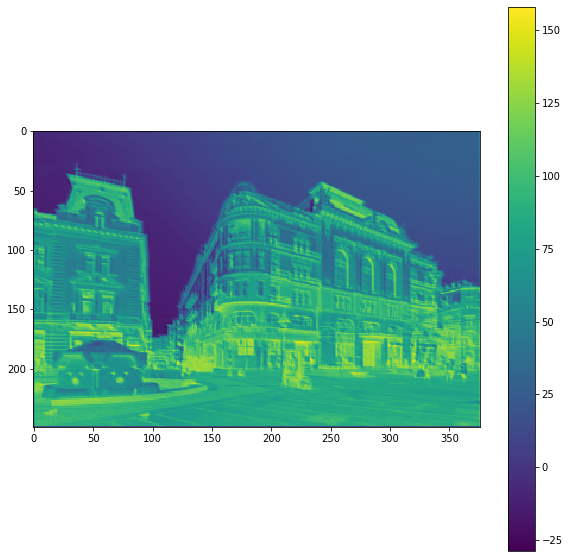

In [221]:
# ResNet layer
#   53 - horizontal edge detector
#   47 - oriented gabor filter

plt.figure(figsize=(10, 10))
plt.imshow(activations[0, :, :, 23])
plt.colorbar()

**See multiple responses**

As we see form filter and response, number 9 in ResNet is probably not that well trained.

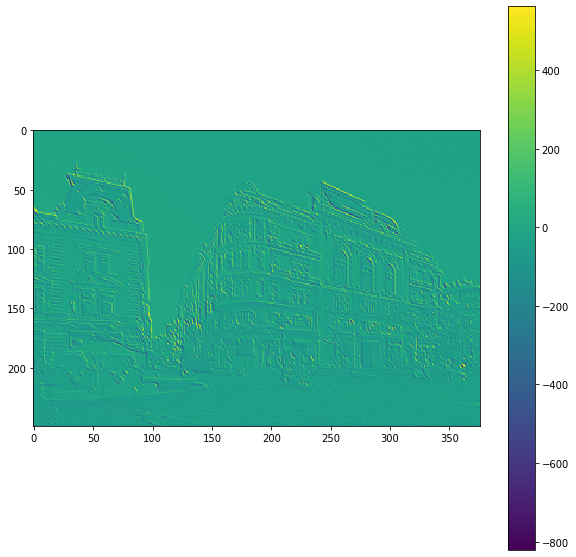

0


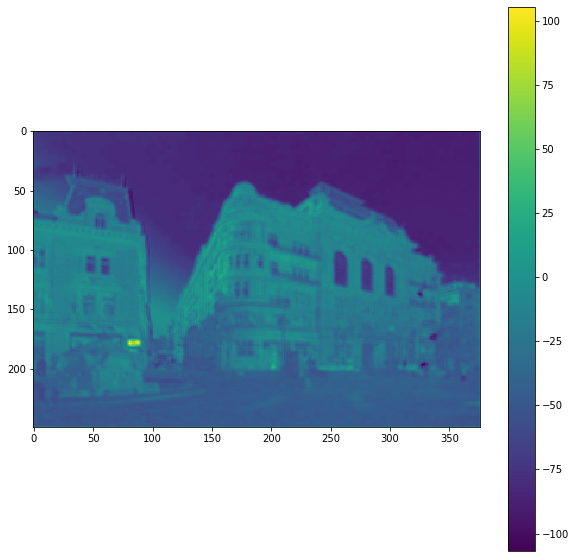

1


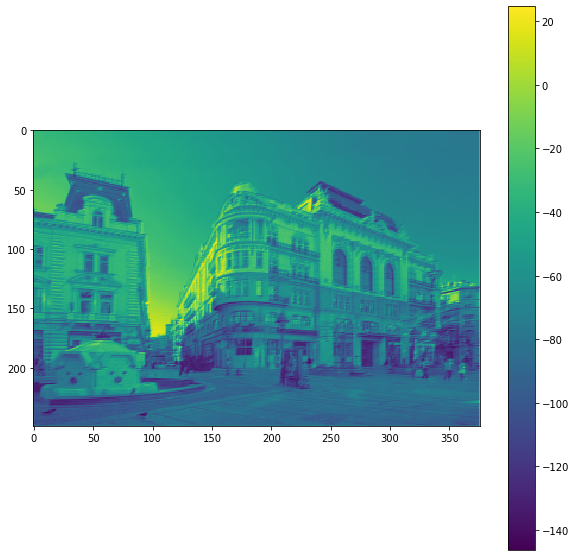

2


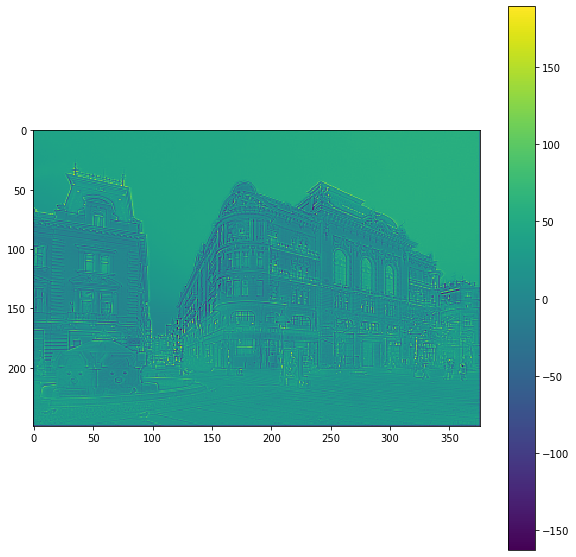

3


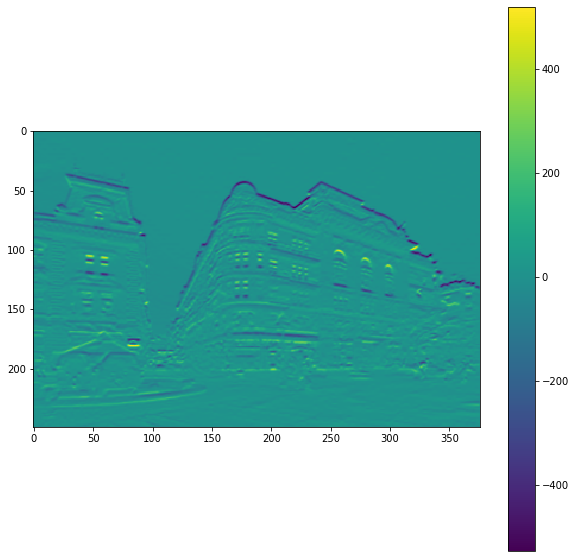

4


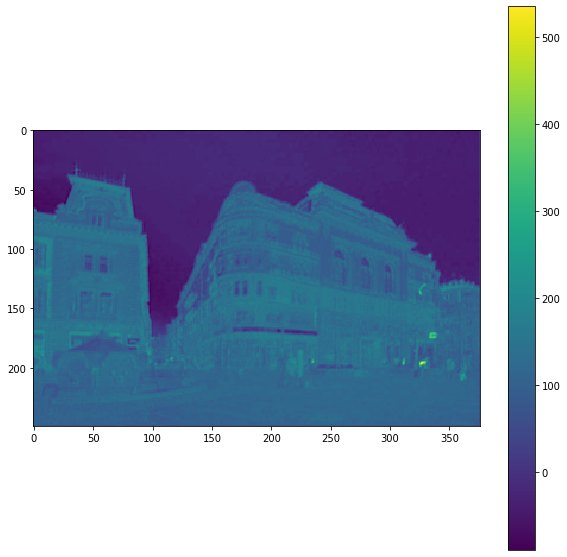

5


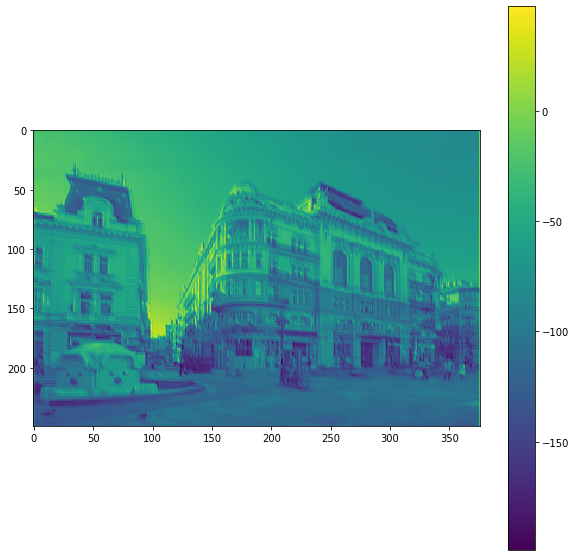

6


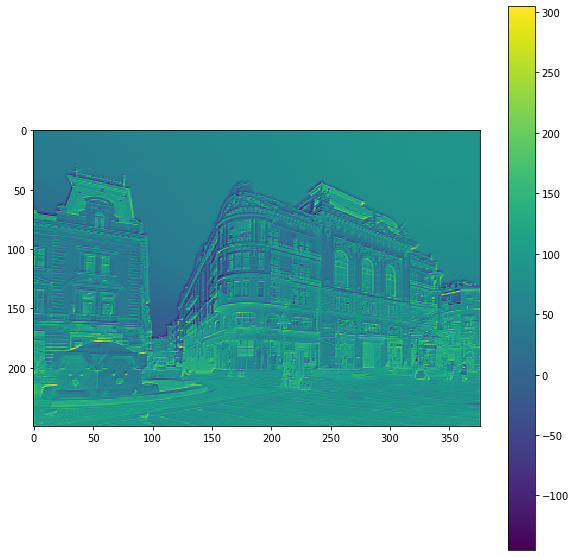

7


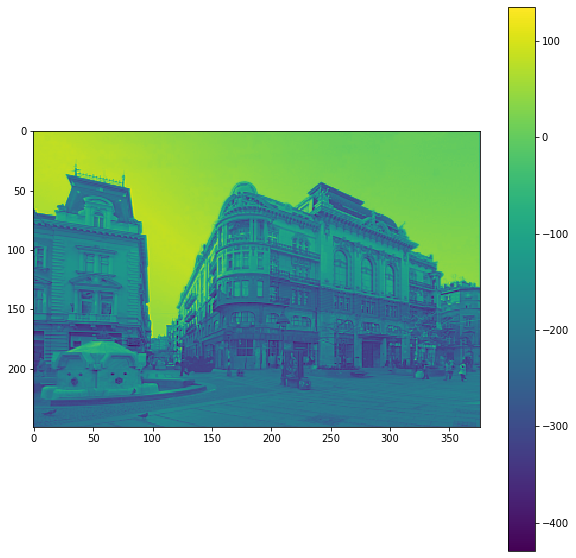

8


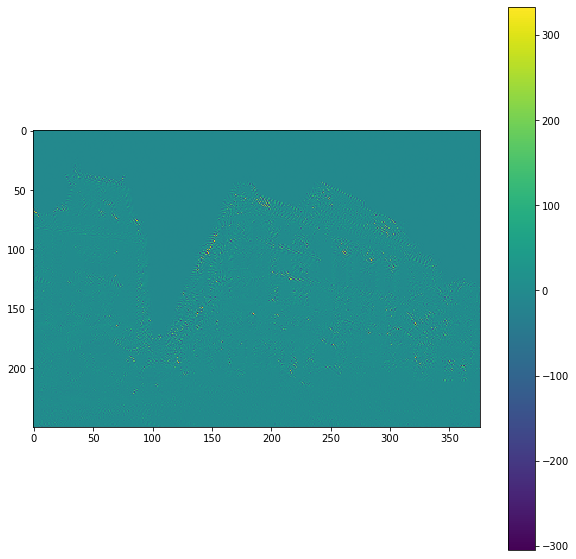

9


In [224]:
for i in range(0, 10):
  plt.figure(figsize=(10, 10))
  plt.imshow(activations[0, :, :, i])
  plt.colorbar()
  plt.show()
  print(i)

# Part 2: Gradient ascent

Make sure that model from Part 1 is loaded, currently only supports VGG


Steps


1.   Trivial approach
2.   Introduce normalized gradients
3.   Process image for plt (stretch) 
4.   Introduce low pass - blur of the input every step
5.   A bit better would be to do bilateral filter
6.   Introduce Jitter
7.   Introduce Rotation
8.   See what is the best combination of those
9.   Work with ResNet model



## Basic intro to gradient ascent visualization

In [0]:
#INPUT_INIT = 'RANDOM_GRAY'
#INPUT_INIT = 'RANDOM_TRIVIAL'
INPUT_INIT = 'RANDOM_LIMITED'

dim = [224, 224]

if INPUT_INIT == 'RANDOM_GRAY':
  # Gray image with random noise
  input_img_data = np.zeros((1, dim[0], dim[1], 3))
  random_chanel_noise = np.random.random((1, dim[0], dim[1], 1))
  input_img_data[0, :, :, 0] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
  input_img_data[0, :, :, 1] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
  input_img_data[0, :, :, 2] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
elif INPUT_INIT == 'RANDOM_TRIVIAL':
  input_img_data = np.random.randint(0, 255, (224, 224, 3)).astype(np.float32)
  input_img_data = np.expand_dims(input_img_data, axis=0)
elif INPUT_INIT == 'RANDOM_LIMITED':
  input_img_data = np.random.randint(120, 150, (224, 224, 3)).astype(np.float32)
  input_img_data = np.expand_dims(input_img_data, axis=0)

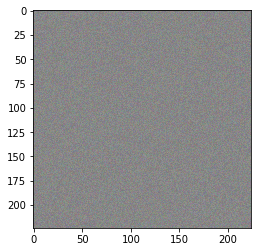

In [608]:
plt.imshow(input_img_data[0, :, :, :].astype(np.uint8))

In [609]:
model.layers[150].name

IndexError: ignored

In [610]:
if MODEL_NAME == 'VGG':
  loss = K.mean(model.layers[16].output[:, :, :, 19])
  print(model.layers[16].name)
elif MODEL_NAME == 'ResNet':
  loss = K.mean(model.layers[150].output[:, :, :, 5])
  print(model.layers[150].name)

block5_conv2


In [0]:
def normalize_gradients(g):
  #return g / (K.abs(g) + K.epsilon())
  return g / (K.sqrt(K.mean(K.square(g))) + K.epsilon())

grads = K.gradients([loss], [model.inputs[0]])
grads = grads[0]
grads_norm = normalize_gradients(grads)

In [0]:
iterate = K.function([model.inputs[0]], [grads, grads_norm, loss])

In [613]:
# normalized grads vs normal
# use gaussian blur, bilateral filter, jitter, rotate
# learning rate comparison - 0.05, 0.1 or 1.0, learning rate decay

# Do I need this?
# input_img_data = tf.keras.applications.vgg16.preprocess_input(input_img_data[0, :, :, :])
# input_img_data = np.expand_dims(input_img_data, axis=0)

for i in range(512):
  step = 0.1
  grads_value, grads_norm_value, loss_value = iterate([input_img_data])
  #input_img_data += grads_norm_value * step 

  # jitter
  input_img_data += np.random.randint(-1, 1, (1, 224, 224, 3))

  # rotate
  #input_img_data = scipy.ndimage.rotate(input_img_data[0, :, :, :].astype(np.float32), (np.random.rand() - 0.5)*5.0, reshape=False)
  #input_img_data = scipy.ndimage.rotate(input_img_data[0, :, :, :].astype(np.float32), np.random.choice([-5, 0, 5]), reshape=False)
  #input_img_data = np.expand_dims(input_img_data, axis=0)

  # blur
  input_img_data = cv2.GaussianBlur(input_img_data[0, :, :, :], (5, 5), sigmaX=0.5, sigmaY=0.5)
  #input_img_data = cv2.bilateralFilter(input_img_data[0, :, :, :].astype(np.float32), 4, 100, 100)
  input_img_data = np.expand_dims(input_img_data, axis=0)

  input_img_data += grads_norm_value * step 

  print(i, loss_value)

0 0.077220455
1 0.6666814
2 1.7562491
3 3.3795846
4 5.8757067
5 8.634511
6 11.143349
7 12.979845
8 14.5943
9 17.182905
10 19.572447
11 21.998817
12 24.044989
13 27.068228
14 30.39091
15 33.543266
16 36.004536
17 38.69617
18 41.62476
19 44.357944
20 47.042923
21 49.319576
22 52.047237
23 54.49312
24 57.368996
25 59.594822
26 61.619373
27 64.10982
28 66.04997
29 67.50725
30 69.630714
31 70.80681
32 72.03069
33 73.91936
34 75.824066
35 77.92076
36 79.96599
37 82.47136
38 83.82398
39 85.135345
40 86.97412
41 89.257744
42 90.59218
43 92.18887
44 93.73535
45 95.09287
46 95.814285
47 96.30169
48 97.48311
49 98.45016
50 99.14496
51 100.42669
52 101.705956
53 102.72366
54 103.856026
55 104.47553
56 104.71451
57 104.89459
58 105.06456
59 105.186874
60 106.25414
61 107.143036
62 108.32076
63 108.86732
64 109.41878
65 110.34294
66 110.583534
67 110.694954
68 110.42066
69 110.861824
70 111.18925
71 112.21934
72 112.96413
73 113.57395
74 114.49857
75 115.62426
76 116.33165
77 116.692345
78 116.88325

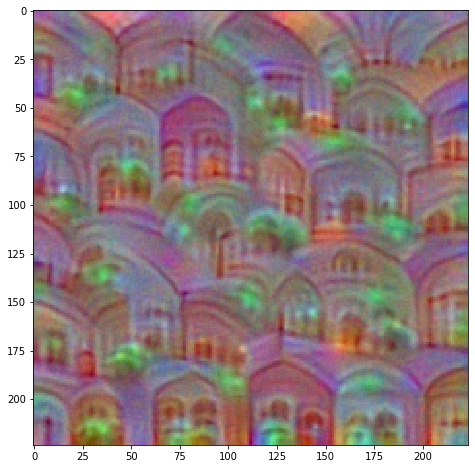

In [614]:
plt.figure(figsize=(8, 8))

def prepare_image_for_plt(img):
  img = (img - img.min()) / (img.max() - img.min())
  img = img * 255.0

  return img

plt.imshow(prepare_image_for_plt(input_img_data[0, :, :, :]).astype(np.uint8))

## Automate comparison

In [0]:
to_compare = [{'blur': False, 'jitter': False, 'bilateral': False, 'init': 'RANDOM_GRAY'},
              {'blur': True, 'jitter': False, 'bilateral': False, 'init': 'RANDOM_GRAY'},
              {'blur': True, 'jitter': True, 'bilateral': False, 'init': 'RANDOM_GRAY'},
              {'blur': False, 'jitter': True, 'bilateral': False,'init': 'RANDOM_GRAY'},
              {'blur': False, 'jitter': True, 'bilateral': True, 'init': 'RANDOM_GRAY'}]

In [0]:
def visualize_filter(model, layer_id, filter_id, params):
  INPUT_INIT = params['init']

  dim = [224, 224]

  if INPUT_INIT == 'RANDOM_GRAY':
    # Gray image with random noise
    input_img_data = np.zeros((1, dim[0], dim[1], 3))
    random_chanel_noise = np.random.random((1, dim[0], dim[1], 1))
    input_img_data[0, :, :, 0] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
    input_img_data[0, :, :, 1] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
    input_img_data[0, :, :, 2] = (random_chanel_noise[0, :, :, 0] - 0.5) * 20.0 + 128.0
  elif INPUT_INIT == 'RANDOM_TRIVIAL':
    input_img_data = np.random.randint(0, 255, (224, 224, 3)).astype(np.float32)
    input_img_data = np.expand_dims(input_img_data, axis=0)
  elif INPUT_INIT == 'RANDOM_LIMITED':
    input_img_data = np.random.randint(120, 150, (224, 224, 3)).astype(np.float32)
    input_img_data = np.expand_dims(input_img_data, axis=0)

  loss = K.mean(model.layers[layer_id].output[:, :, :, filter_id])

  def normalize_gradients(g):
    #return g / (K.abs(g) + K.epsilon())
    return g / (K.sqrt(K.mean(K.square(g))) + K.epsilon())

  grads = K.gradients([loss], [model.inputs[0]])
  grads = grads[0]
  grads_norm = normalize_gradients(grads)


  for i in range(256):
    step = 0.1
    grads_value, grads_norm_value, loss_value = iterate([input_img_data])
    #input_img_data += grads_norm_value * step

    # jitter
    if params['jitter']:
      input_img_data += np.random.randint(-1, 1, (1, 224, 224, 3))

    # rotate
    #input_img_data = scipy.ndimage.rotate(input_img_data[0, :, :, :].astype(np.float32), (np.random.rand() - 0.5)*5.0, reshape=False)
    #input_img_data = np.expand_dims(input_img_data, axis=0)

    # blur
    if params['blur']:
      input_img_data = cv2.GaussianBlur(input_img_data[0, :, :, :], (5, 5), sigmaX=0.5, sigmaY=0.5)
      input_img_data = np.expand_dims(input_img_data, axis=0)
    if params['bilateral']:
      input_img_data = cv2.bilateralFilter(input_img_data[0, :, :, :].astype(np.float32), 4, 100, 100)
      input_img_data = np.expand_dims(input_img_data, axis=0)

    input_img_data += grads_norm_value * step 

    #print(i, loss_value)

  return prepare_image_for_plt(input_img_data[0, :, :, :]).astype(np.uint8)

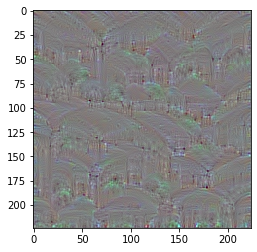

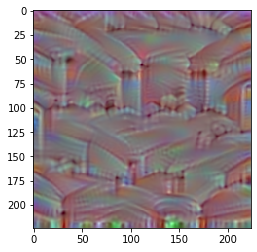

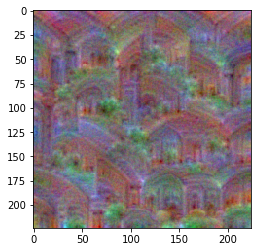

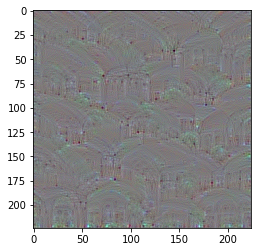

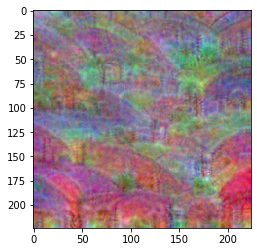

In [444]:
for params in to_compare:
  plt.figure()
  img = visualize_filter(model, 16, 19, params)
  plt.imshow(img)
  plt.show()